In [70]:
# Magic Commands
%matplotlib notebook
%matplotlib inline

In [71]:
#Import Dependencies
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import statistics as stat

In [72]:
# Assign File Paths
ride_data_file_path = os.path.join('..','Resources','ride_data.csv')
city_data_file_path = os.path.join('..','Resources','city_data.csv')

# Extract Data
ride_data_df = pd.read_csv(ride_data_file_path)
city_data_df = pd.read_csv(city_data_file_path)

In [73]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [74]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [75]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [76]:
ride_data_df.city.unique()

array(['Lake Jonathanshire', 'South Michelleport', 'Port Samanthamouth',
       'Rodneyfort', 'South Jack', 'South Latoya', 'New Paulville',
       'Simpsonburgh', 'South Karenland', 'North Jasmine',
       'New Kimberlyborough', 'West Angela', 'Roberthaven', 'North Jason',
       'Williamsview', 'Leahton', 'West Anthony', 'New Paulton',
       'West Patrickchester', 'Deanville', 'West Josephberg',
       'West Samuelburgh', 'West Heidi', 'Loganberg', 'Huntermouth',
       'Grahamburgh', 'Port Frank', 'East Kaylahaven', 'West Robert',
       'North Markport', 'Richardfort', 'Reynoldsfurt', 'Justinberg',
       'Martinezhaven', 'Jerryton', 'Lake Scottton', 'South Evanton',
       'Rogerston', 'West Ericstad', 'Hurleymouth', 'Joneschester',
       'Port Angela', 'Barajasview', 'West Christopherberg',
       'New Jacobville', 'Port David', 'Valentineton', 'Carriemouth',
       'Williamsstad', 'Royland', 'Karenberg', 'Christopherfurt',
       'Liumouth', 'Johnton', 'Erikaland', 'Raymondhav

In [77]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [78]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [79]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [80]:
city_data_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [81]:
city_data_df.type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [82]:
pyber_df = ride_data_df.merge(city_data_df, how = 'left', on = 'city')

In [83]:
pyber_df.count()

city            2375
date            2375
fare            2375
ride_id         2375
driver_count    2375
type            2375
dtype: int64

In [84]:
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


# Average Fare vs Number of Rides/Drivers

In [85]:
# Split the City DataFrame into City Type DataFrames
pyber_urban_df = pyber_df.loc[(pyber_df.type == 'Urban')][['city','driver_count','ride_id','fare']]
pyber_suburban_df = pyber_df.loc[(pyber_df.type == 'Suburban')][['city','driver_count','ride_id','fare']]
pyber_rural_df = pyber_df.loc[(pyber_df.type == 'Rural')][['city','driver_count','ride_id','fare']]

In [86]:
# Aggregate values by City
urban_drivers_by_city = pyber_urban_df.groupby(['city']).mean()['driver_count']
urban_rides_by_city = pyber_urban_df.groupby(pyber_df['city']).count()['ride_id']
urban_fare_by_city = pyber_urban_df.groupby(pyber_df['city']).mean()['fare']

suburban_drivers_by_city = pyber_suburban_df.groupby(['city']).mean()['driver_count']
suburban_rides_by_city = pyber_suburban_df.groupby(pyber_df['city']).count()['ride_id']
suburban_fare_by_city = pyber_suburban_df.groupby(pyber_df['city']).mean()['fare']

rural_drivers_by_city = pyber_rural_df.groupby(['city']).mean()['driver_count']
rural_rides_by_city = pyber_rural_df.groupby(pyber_df['city']).count()['ride_id']
rural_fare_by_city = pyber_rural_df.groupby(pyber_df['city']).mean()['fare']

In [87]:
# Build the DataFrames grouped by City
pyber_city_urban_df = pd.DataFrame({
    "Drivers" : urban_drivers_by_city,
    "Total Rides" : urban_rides_by_city,
    "Average Fare" : urban_fare_by_city
})
pyber_city_suburban_df = pd.DataFrame({
    "Drivers" : suburban_drivers_by_city,
    "Total Rides" : suburban_rides_by_city,
    "Average Fare" : suburban_fare_by_city
})
pyber_city_rural_df = pd.DataFrame({
    "Drivers" : rural_drivers_by_city,
    "Total Rides" : rural_rides_by_city,
    "Average Fare" : rural_fare_by_city
})

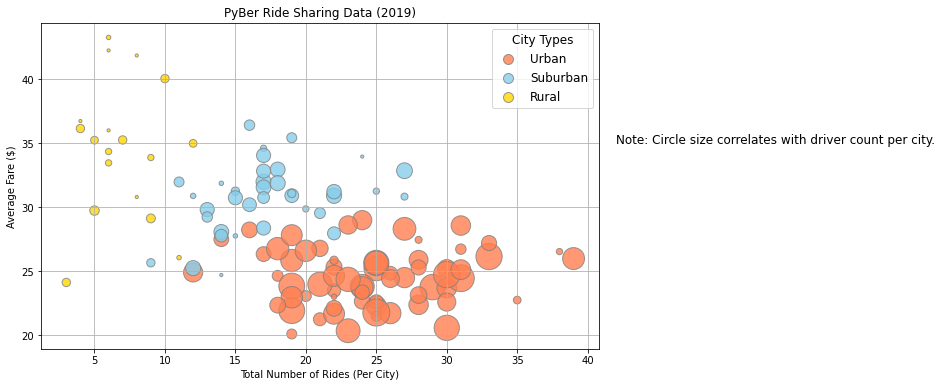

In [88]:
# Plot
plt.subplots(figsize=(10,6))
plt.scatter(
    pyber_city_urban_df['Total Rides'],
    pyber_city_urban_df['Average Fare'],
    s = 10*pyber_city_urban_df['Drivers'],
    c = 'coral',
    edgecolor = 'gray',
    linewidths = 1,
    alpha = 0.8,
    label = 'Urban'
)
plt.scatter(
    pyber_city_suburban_df['Total Rides'],
    pyber_city_suburban_df['Average Fare'],
    s = 10*pyber_city_suburban_df['Drivers'],
    c = 'skyblue',
    edgecolor = 'gray',
    alpha = 0.8,
    label = 'Suburban'
)
plt.scatter(
    pyber_city_rural_df['Total Rides'],
    pyber_city_rural_df['Average Fare'],
    s = 10*pyber_city_rural_df['Drivers'],
    c = 'gold',
    edgecolor = 'gray',
    alpha = 0.8,
    label = 'Rural'
)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('PyBer Ride Sharing Data (2019)')
plt.grid()

# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]
lgnd.get_title().set_fontsize(12)

# Note
plt.text(42,35,'Note: Circle size correlates with driver count per city.',fontsize=12, wrap=True)
# plt.tight_layout()

# Save
fig1_path = os.path.join('..','Resources','Fig1.png')
plt.savefig(fig1_path)

# Statistical Summary of Rides by City Type

In [89]:
pyber_df.groupby(pyber_df['type']).count()['ride_id']

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [90]:
pyber_urban_df.describe()

,driver_count,ride_id,fare
count,1625.000000,1.625000e+03,1625.000000
mean,36.678154,4.873485e+12,24.525772
std,20.075545,2.907440e+12,11.738649
min,3.000000,1.458810e+10,4.050000
25%,22.000000,2.400244e+12,14.550000
50%,37.000000,4.711188e+12,24.640000
75%,52.000000,7.451579e+12,34.580000
max,73.000000,9.991538e+12,44.970000


In [91]:
pyber_suburban_df.describe()

,driver_count,ride_id,fare
count,625.000000,6.250000e+02,625.000000
mean,13.712000,4.971015e+12,30.970128
std,8.042372,2.912410e+12,10.677508
min,1.000000,3.218337e+08,12.050000
25%,5.000000,2.364253e+12,21.970000
50%,16.000000,5.053221e+12,30.750000
75%,21.000000,7.551674e+12,39.830000
max,25.000000,9.917744e+12,49.960000


In [92]:
pyber_rural_df.describe()

,driver_count,ride_id,fare
count,125.000000,1.250000e+02,125.000000
mean,4.296000,4.647746e+12,34.623440
std,2.691156,2.887834e+12,14.558046
min,1.000000,2.684873e+10,10.110000
25%,1.000000,2.275364e+12,19.900000
50%,4.000000,4.023962e+12,37.050000
75%,7.000000,7.118047e+12,47.070000
max,9.000000,9.990581e+12,58.550000


In [93]:
round(urban_rides_by_city.mean(),2),round(suburban_rides_by_city.mean(),2),round(rural_rides_by_city.mean(),2)

(24.62, 17.36, 6.94)

In [94]:
round(urban_rides_by_city.median(),2),round(suburban_rides_by_city.median(),2),round(rural_rides_by_city.median(),2)

(24.0, 17.0, 6.0)

In [95]:
round(urban_rides_by_city.mode(),2),round(suburban_rides_by_city.mode(),2),round(rural_rides_by_city.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [96]:
# Central Tendency of Urban Rides Using Numpy & SciPy
np.mean(urban_rides_by_city),np.median(urban_rides_by_city),sts.mode(urban_rides_by_city)

(24.62121212121212, 24.0, ModeResult(mode=array([22]), count=array([7])))

In [97]:
# Central Tendency of Suburban Rides Using Numpy & SciPy
np.mean(suburban_rides_by_city),np.median(suburban_rides_by_city),sts.mode(suburban_rides_by_city)

(17.36111111111111, 17.0, ModeResult(mode=array([17]), count=array([7])))

In [98]:
# Central Tendency of Rural Rides Using Numpy & SciPy
np.mean(rural_rides_by_city),np.median(rural_rides_by_city),sts.mode(rural_rides_by_city)

(6.944444444444445, 6.0, ModeResult(mode=array([6]), count=array([5])))

# Statistical Summary of Avg Fare by City Type

In [99]:
urban_fare = pyber_urban_df['fare']
urban_fare.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [100]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fare)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fare)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fare)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [101]:
suburban_fare = pyber_suburban_df['fare']

In [102]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fare)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fare)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fare)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [103]:
rural_fare = pyber_rural_df['fare']

In [104]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fare)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fare)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fare)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


# Statistical Summary of Driver Count by City Type

In [105]:
urban_drivers = pyber_urban_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [106]:
np.mean(urban_drivers), np.median(urban_drivers), sts.mode(urban_drivers)

(36.67815384615385, 37.0, ModeResult(mode=array([39]), count=array([86])))

In [107]:
suburban_drivers = pyber_suburban_df['driver_count']

In [108]:
np.mean(suburban_drivers), np.median(suburban_drivers), sts.mode(suburban_drivers)

(13.712, 16.0, ModeResult(mode=array([20]), count=array([79])))

In [109]:
rural_drivers = pyber_rural_df['driver_count']

In [110]:
np.mean(rural_drivers), np.median(rural_drivers), sts.mode(rural_drivers)

(4.296, 4.0, ModeResult(mode=array([1]), count=array([32])))

# Box and Whisker Plot for Rides

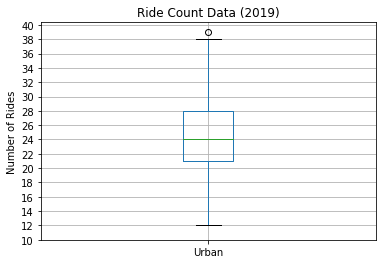

In [111]:
# Urban Rides
urban_plot = urban_rides_by_city.plot(kind='box')
urban_plot.set_xticklabels(['Urban'])
urban_plot.set_yticks(np.arange(10,41,2))
urban_plot.set_ylabel('Number of Rides')
urban_plot.set_title('Ride Count Data (2019)')
urban_plot.grid()

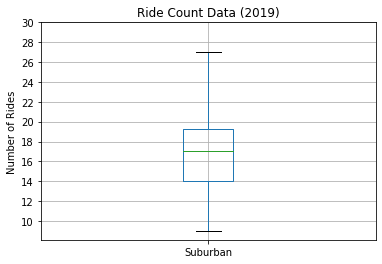

In [112]:
# Suburban Rides
suburban_plot = suburban_rides_by_city.plot(kind='box')
suburban_plot.set_xticklabels(['Suburban'])
suburban_plot.set_yticks(np.arange(10,31,2))
suburban_plot.set_ylabel('Number of Rides')
suburban_plot.set_title('Ride Count Data (2019)')
suburban_plot.grid()

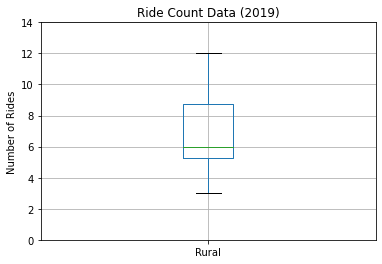

In [113]:
# Rural Rides
rural_plot = rural_rides_by_city.plot(kind='box')
rural_plot.set_xticklabels(['Rural'])
rural_plot.set_yticks(np.arange(0,15,2))
rural_plot.set_ylabel('Number of Rides')
rural_plot.set_title('Ride Count Data (2019)')
rural_plot.grid()

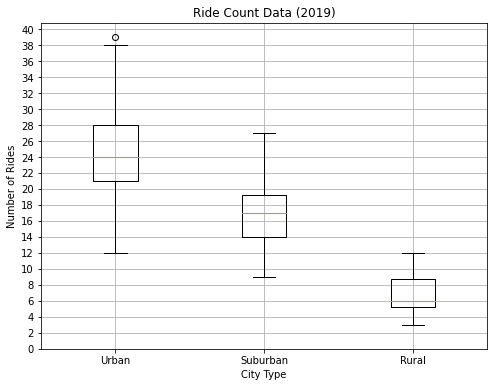

In [114]:
# All City Types
fig,ax = plt.subplots(figsize=(8,6))
ax.boxplot([urban_rides_by_city, suburban_rides_by_city, rural_rides_by_city])
ax.set_xticklabels(['Urban','Suburban','Rural'])
ax.set_yticks(np.arange(0,41,2))
ax.set_xlabel('City Type')
ax.set_ylabel('Number of Rides')
ax.set_title('Ride Count Data (2019)')
ax.grid()
plt.savefig('../Resources/Fig2.png')

In [115]:
urban_outlier = urban_rides_by_city[urban_rides_by_city == 39].index[0]
urban_outlier

'West Angela'

# Box and Whisker Plot for Ride Fares

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64


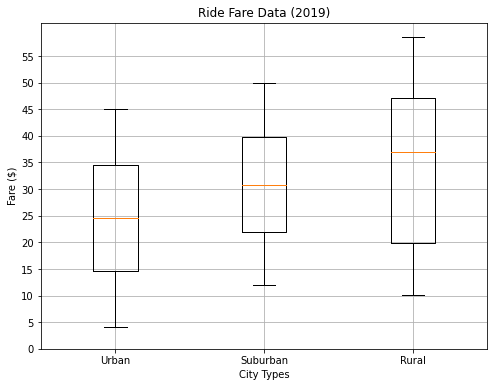

In [116]:
# All City Types
fig,ax = plt.subplots(figsize=(8,6))
ax.boxplot([pyber_urban_df['fare'], pyber_suburban_df['fare'], pyber_rural_df['fare']])
ax.set_xticklabels(['Urban','Suburban','Rural'])
ax.set_yticks(np.arange(0,60,5))
ax.set_xlabel('City Types')
ax.set_ylabel('Fare ($)')
ax.set_title('Ride Fare Data (2019)')
ax.grid()
plt.savefig('../Resources/Fig3.png')
print(pyber_urban_df['fare'].describe())

# Box-and-Whisker Plot for Driver Count

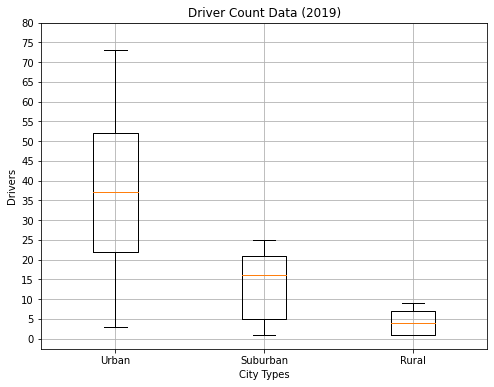

In [117]:
fig,ax=plt.subplots(figsize=(8,6))
ax.boxplot([pyber_urban_df['driver_count'],pyber_suburban_df['driver_count'],pyber_rural_df['driver_count']])
ax.set_xticklabels(['Urban','Suburban','Rural'])
ax.set_yticks(np.arange(0,85,5))
ax.set_xlabel('City Types')
ax.set_ylabel('Drivers')
ax.set_title('Driver Count Data (2019)')
ax.grid()
plt.savefig('../Resources/Fig4.png')

# Percentage of Fares for Each City Type

In [118]:
total_fare_by_type = pyber_df.groupby(pyber_df['type']).sum()['fare']
total_fare_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

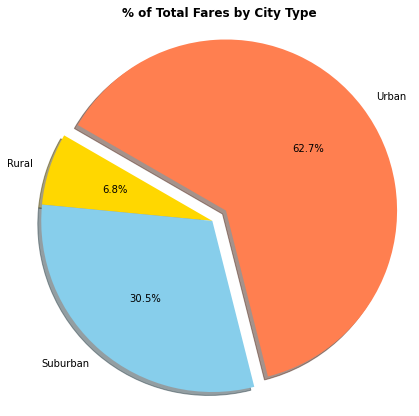

In [119]:
fig,ax = plt.subplots(figsize=(6,6))
ax.pie(
    total_fare_by_type,
    labels = ["Rural", "Suburban", "Urban"],
    colors = ['gold','skyblue','coral'],
    autopct = '%1.1f%%',
    explode = [0,0,0.1],
    startangle = 150,
    shadow = True
)
ax.set_title('% of Total Fares by City Type', fontweight="bold")
mpl.rcParams['font.size'] = 14
ax.axis('equal')
plt.tight_layout()
plt.savefig('../Resources/Fig5.png')

# Percentage of Total Rides for Each City Type

In [120]:
total_rides_by_type = pyber_df.groupby(pyber_df['type']).count()['ride_id']
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

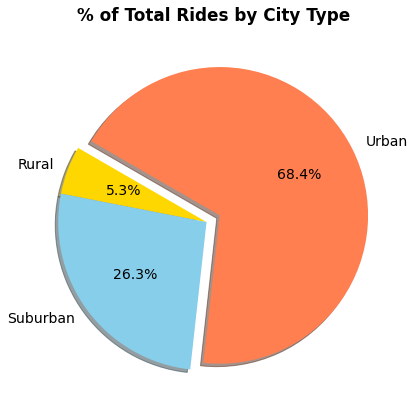

In [121]:
fig,ax = plt.subplots(figsize=(6,6))
ax.pie(
    total_rides_by_type,
    labels = ["Rural", "Suburban", "Urban"],
    colors = ['gold','skyblue','coral'],
    autopct='%1.1f%%',
    explode = [0,0,0.1],
    shadow = True,
    startangle = 150
)
ax.set_title('% of Total Rides by City Type', fontweight="bold")
ax.axis('equal')
mpl.rcParams['font.size'] = 14
plt.tight_layout()
plt.savefig('../Resources/Fig6.png')

# Driver Percentages

In [122]:
total_drivers_by_type = pyber_df.groupby(pyber_df['type']).sum()['driver_count']
total_drivers_by_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

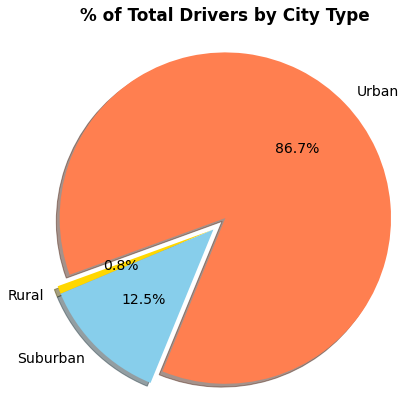

In [123]:
fig,ax = plt.subplots(figsize=(6,6))
ax.pie(
    total_drivers_by_type,
    labels = ["Rural", "Suburban", "Urban"],
    colors = ['gold','skyblue','coral'],
    autopct='%1.1f%%',
    explode = [0,0,0.1],
    shadow = True,
    startangle = 200
)
ax.set_title('% of Total Drivers by City Type', fontweight="bold")
ax.axis('equal')
mpl.rcParams['font.size'] = 14
plt.tight_layout()
plt.savefig('../Resources/Fig7.png')